In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.3

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.family'] = 'DeJavu Serif'

In [4]:
BPATH = "/home/dan/edu/uni/diplomka/tex/Images/charted/"

# Global plot func

In [5]:
import os

def savef(name):
    plt.tight_layout()
    plt.savefig(os.path.join(BPATH, name))

In [6]:
N = 250
SEED = 123
NODES = 15

In [7]:
from kfsims.trajectory import trajectory
trj = trajectory(SEED, N)
true_traj = trj.X.T
cov_traj = trj.R
cov_init = cov_traj

In [8]:
from kfsims import noise
from kfsims.network import create_w_nodes, create_nodes
import numpy as np

np.random.seed(SEED)

In [9]:
nodes = create_nodes(5, trj, cov_init)

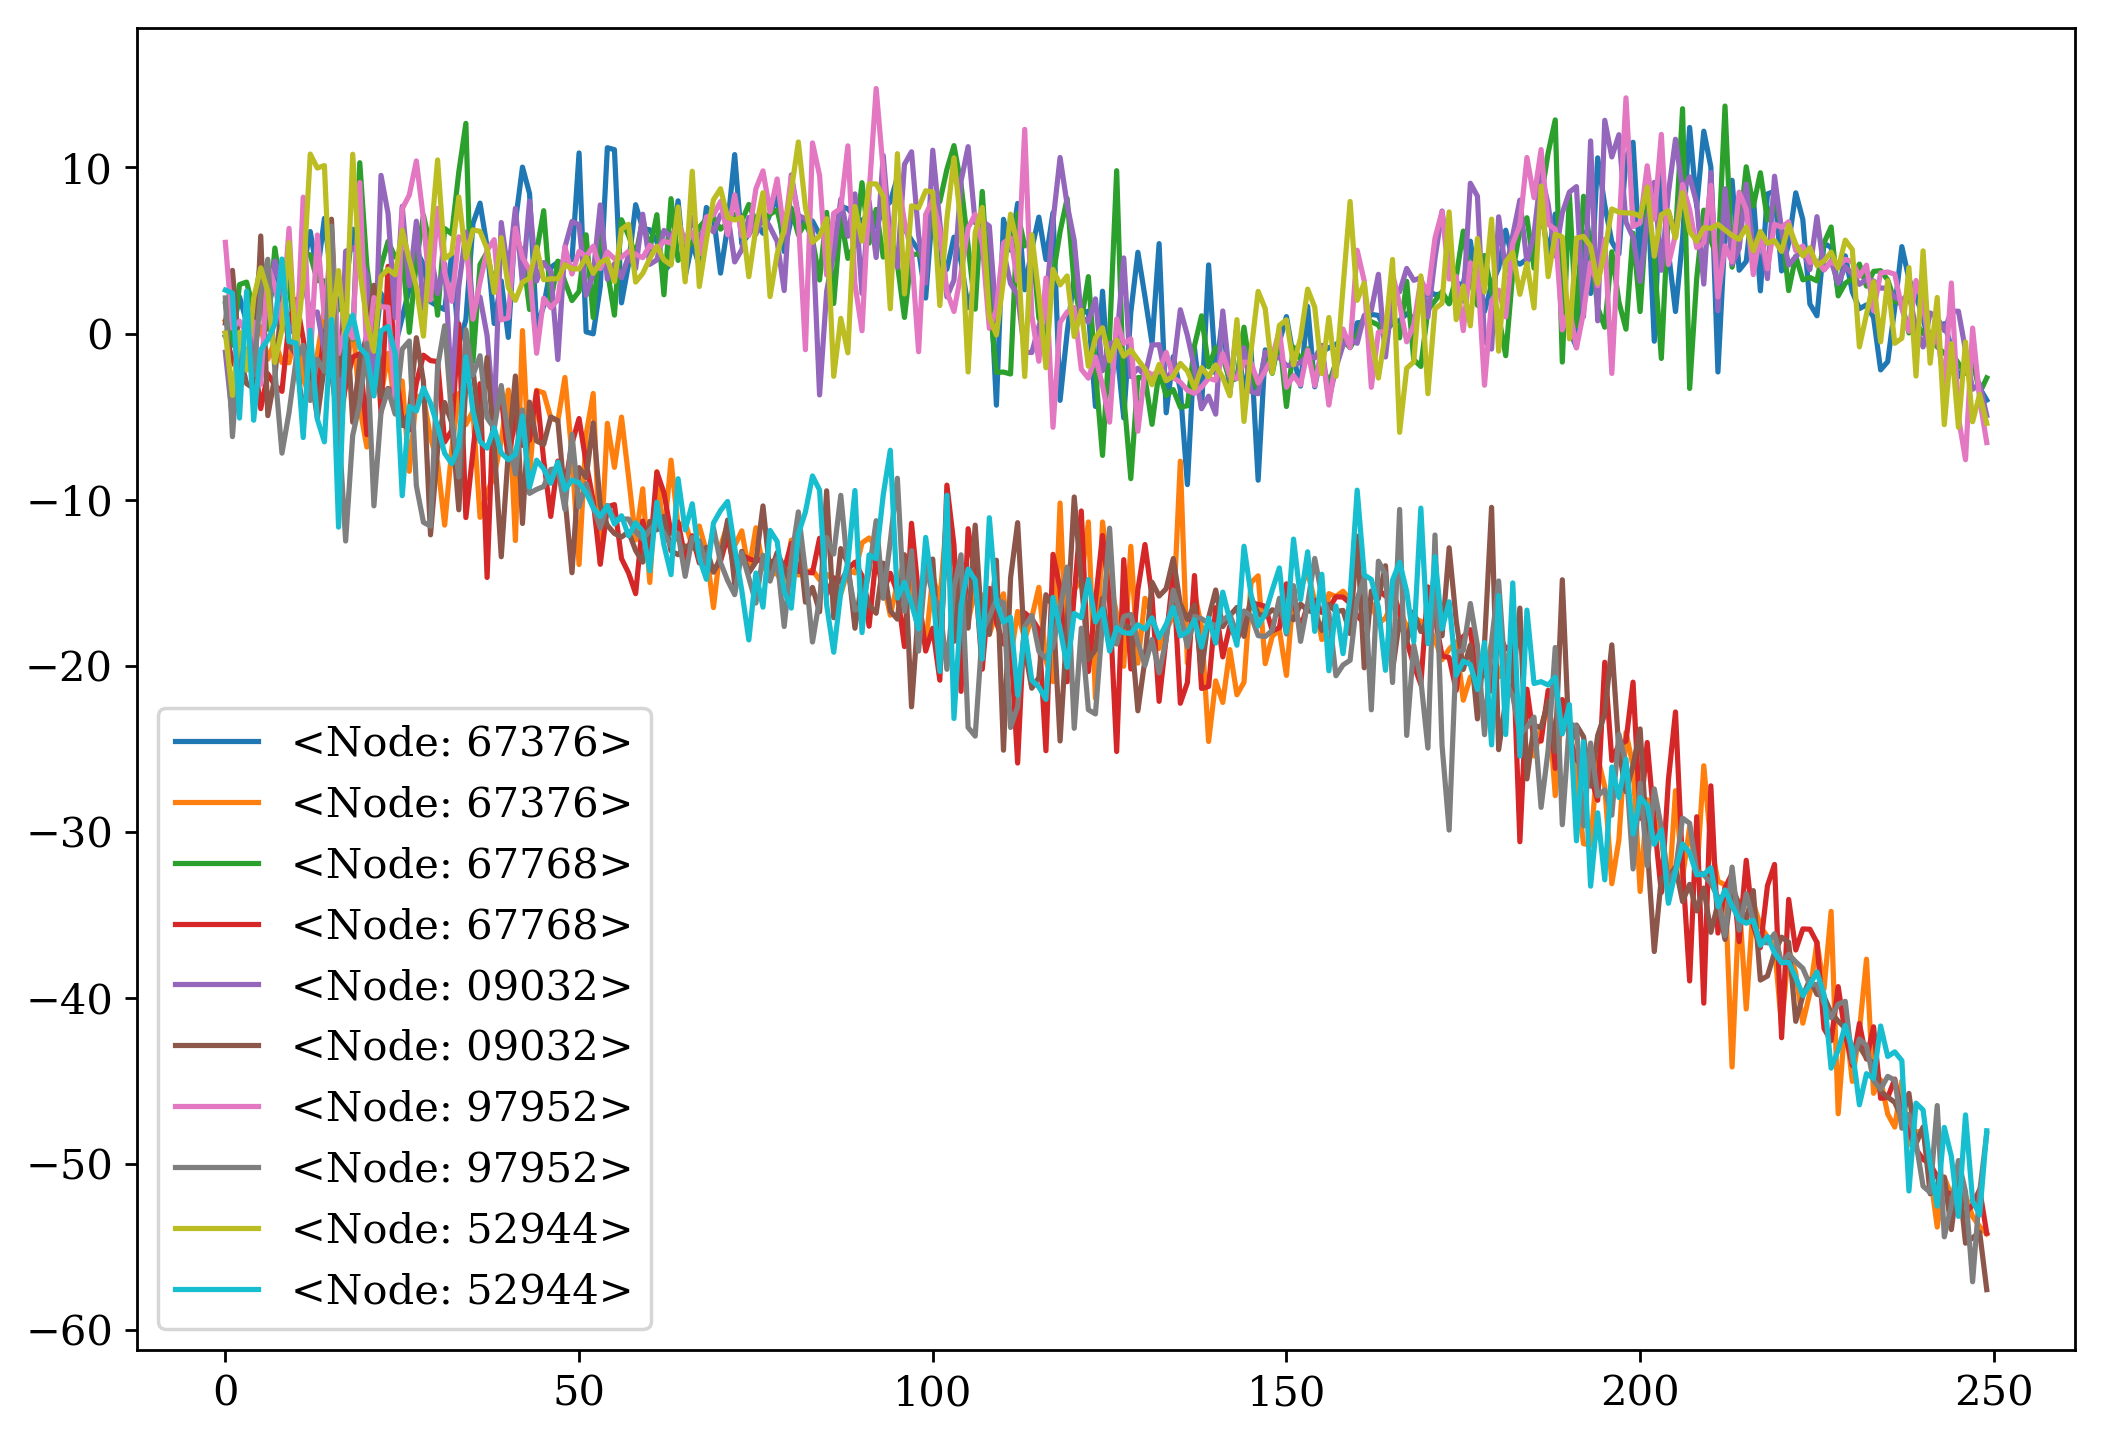

In [10]:
for i in nodes[:5]:
    plt.plot(list(i.observe()), label=f'{i}')
    plt.legend()

In [43]:
for i in [10, 15, 30]:
    nodiff_G = create_w_nodes(i, trj,  cov_init)
    print(i)
    print(nodiff_G.kf_no_diffusion(true_traj.T))

10
(array([0.9152, 0.8649, 1.3597, 1.1531]), array([0.7833, 0.7879, 1.5279, 1.0058]))
15
(array([1.3309, 0.9124, 1.5544, 1.1643]), array([1.4993, 0.8837, 1.8261, 1.0483]))
30
(array([1.1059, 0.9517, 1.4108, 1.2677]), array([1.1268, 0.9215, 1.5406, 1.3647]))


In [58]:
nodiff_G = create_w_nodes(NODES, trj,  cov_init)
nodiff_G.kf_no_diffusion(true_traj.T)

(array([1.0522, 0.9217, 1.3067, 1.2657]),
 array([1.2656, 0.8663, 1.4711, 1.0574]))

Se zpětnou vazbou několikrát je to lepší než když tam mám `- cluster`

In [56]:
for i in [10, 14, 30]:
    diff_G = create_w_nodes(i, trj, cov_init)
    print(i)
    print(diff_G.kf_w_diffusion(true_traj.T))

10
(array([0.9084, 0.8478, 1.3466, 1.1364]), array([0.7728, 0.7357, 1.4831, 0.9703]))
14
(array([0.9209, 0.8399, 1.3588, 1.1444]), array([0.7746, 0.7311, 1.5131, 1.021 ]))
30
(array([0.9107, 0.8885, 1.3316, 1.255 ]), array([0.774 , 0.7914, 1.464 , 1.4018]))


Bez zpětné vazby:

In [55]:
for i in [10, 14, 30]:
    diff_G = create_w_nodes(i, trj, cov_init)
    print(i)
    print(diff_G.kf_w_diffusion(true_traj.T))

10
(array([0.921 , 0.8599, 1.3663, 1.144 ]), array([0.7865, 0.7392, 1.5028, 0.9947]))
14
(array([0.9768, 0.8745, 1.4038, 1.1749]), array([0.8756, 0.7875, 1.5979, 1.0774]))
30
(array([1.0898, 0.9077, 1.3997, 1.2446]), array([1.1085, 0.8232, 1.5491, 1.364 ]))


In [62]:
for i in [10, 15, 30]:
    diff_G = create_w_nodes(i, trj, cov_init)
    print(i)
    print(diff_G.kf_w_diffusion(true_traj.T))

10
(array([0.8833, 0.9086, 1.2376, 1.2669]), array([0.7789, 0.7876, 1.2533, 1.0461]))
15
(array([0.8996, 0.9077, 1.2596, 1.2678]), array([0.7898, 0.7972, 1.3402, 1.0599]))
30
(array([0.9027, 0.9394, 1.2307, 1.3212]), array([0.7922, 0.8253, 1.2499, 1.2581]))


Bylo důležité použít random permutaci u těch nodes!

In [11]:
diff_G = create_w_nodes(NODES, trj, cov_init)
diff_G.kf_w_diffusion(true_traj.T)

(array([0.9512, 0.8466, 1.4165, 1.1459]),
 array([0.8204, 0.7314, 1.6546, 1.0219]))

In [43]:
diff_G = create_w_nodes(NODES, trj, cov_init)
diff_G.kf_w_diffusion(true_traj.T)

(array([0.9649, 0.8361, 1.4246, 1.1375]),
 array([0.848 , 0.7241, 1.6742, 1.0244]))

In [51]:
n = list(diff_G.nodes)[10]

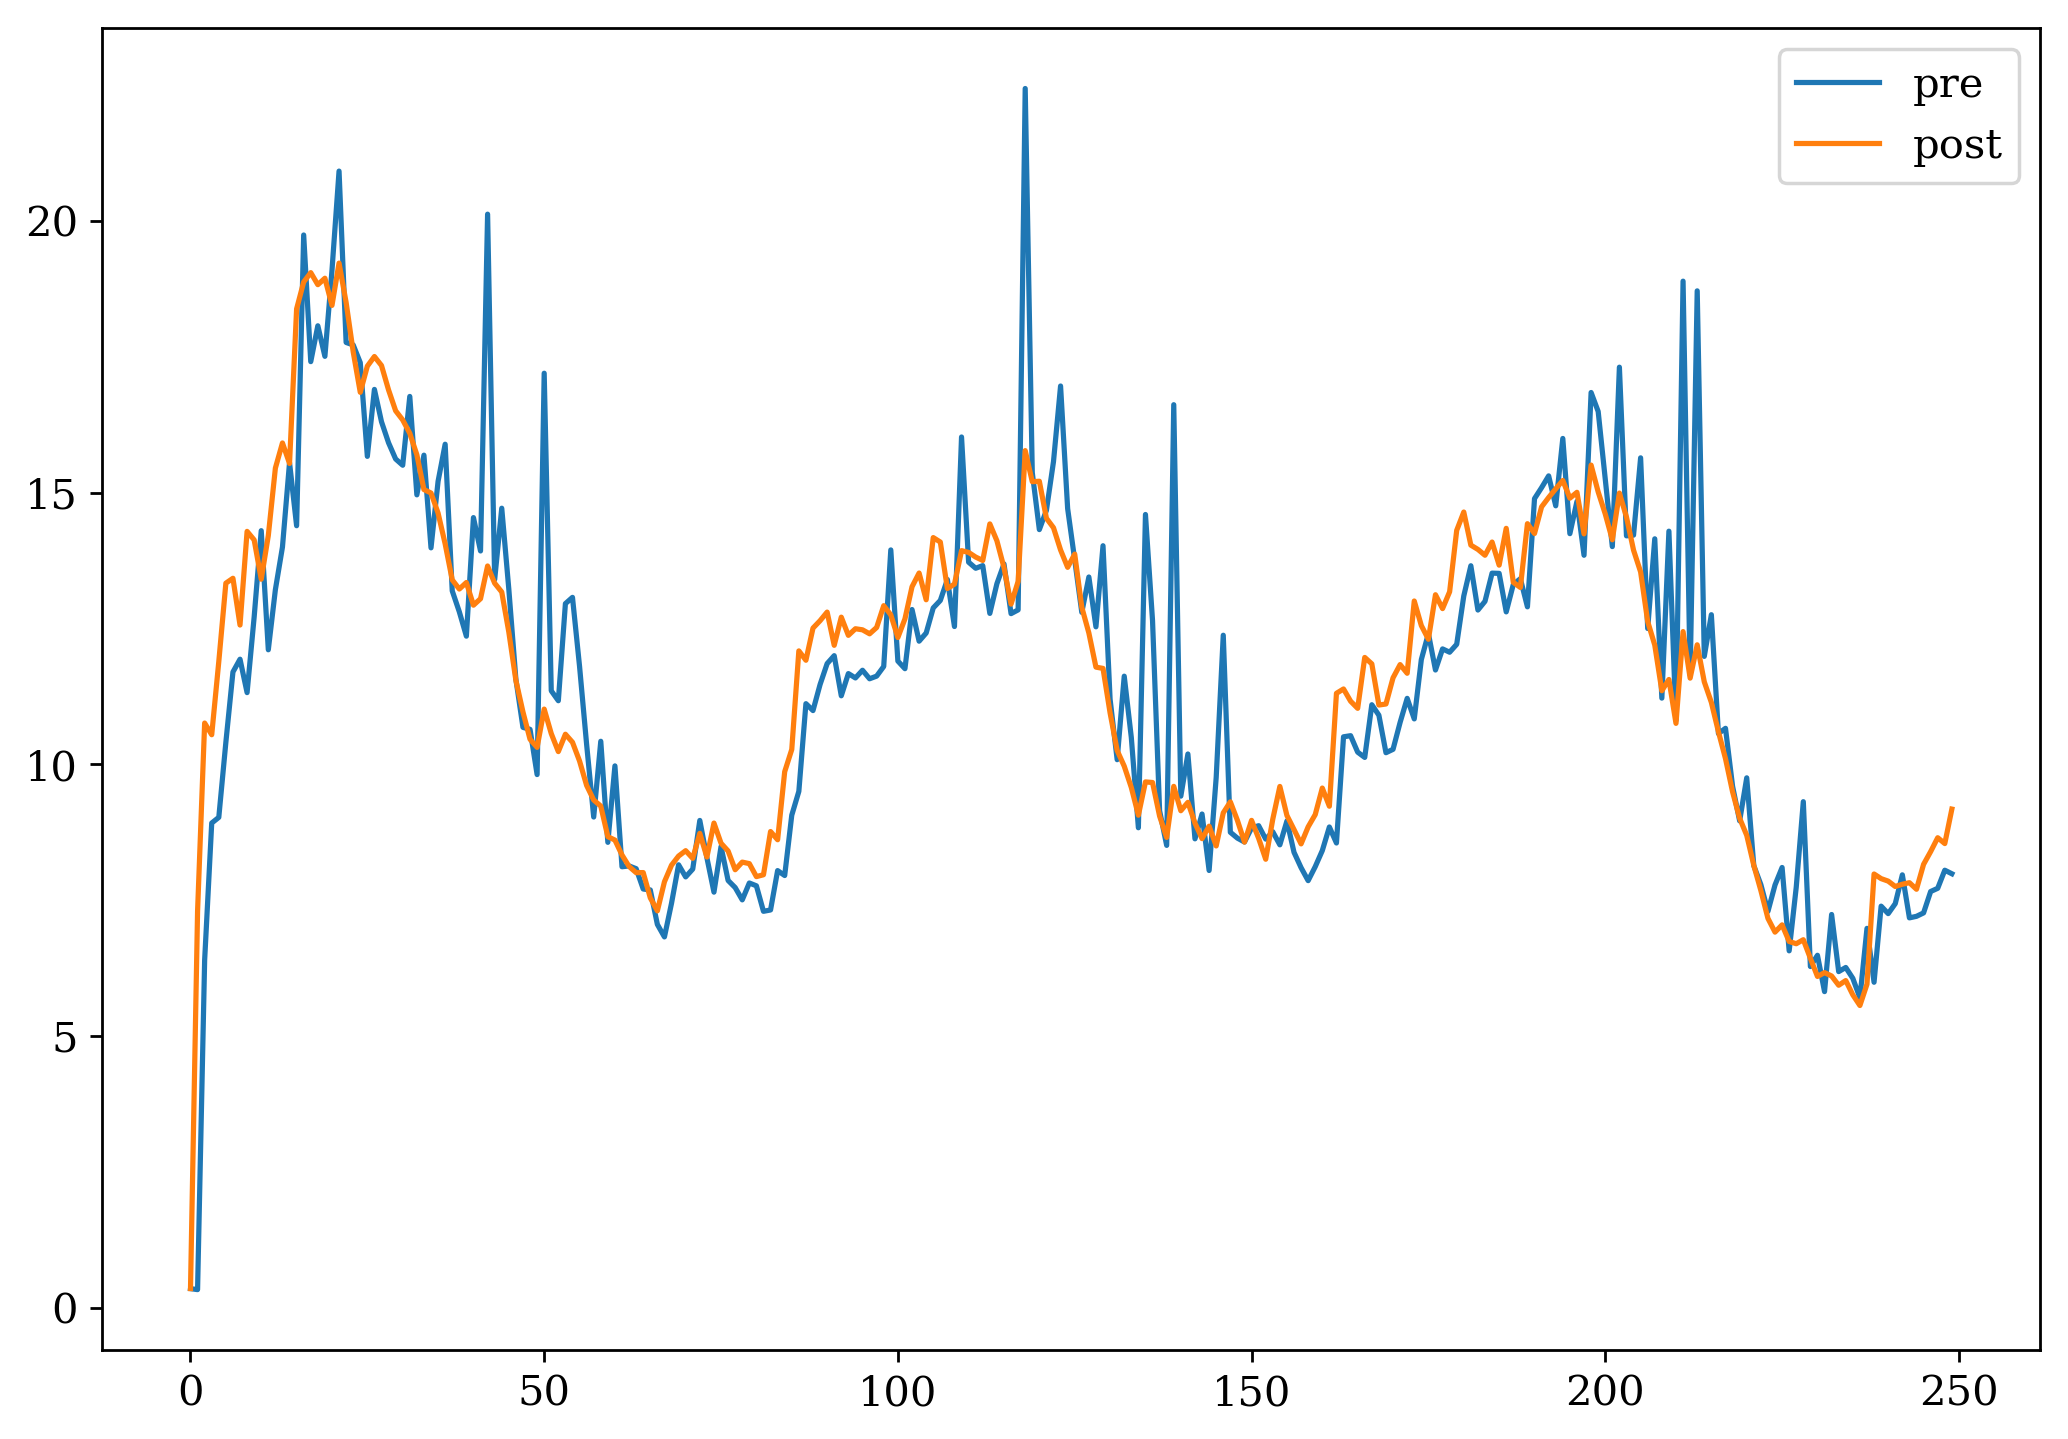

In [54]:
plt.plot(n.norm_r(), label='pre')
plt.plot(np.array([np.linalg.norm(x) for x in n.logger['R_post']]), label='post')
plt.legend()

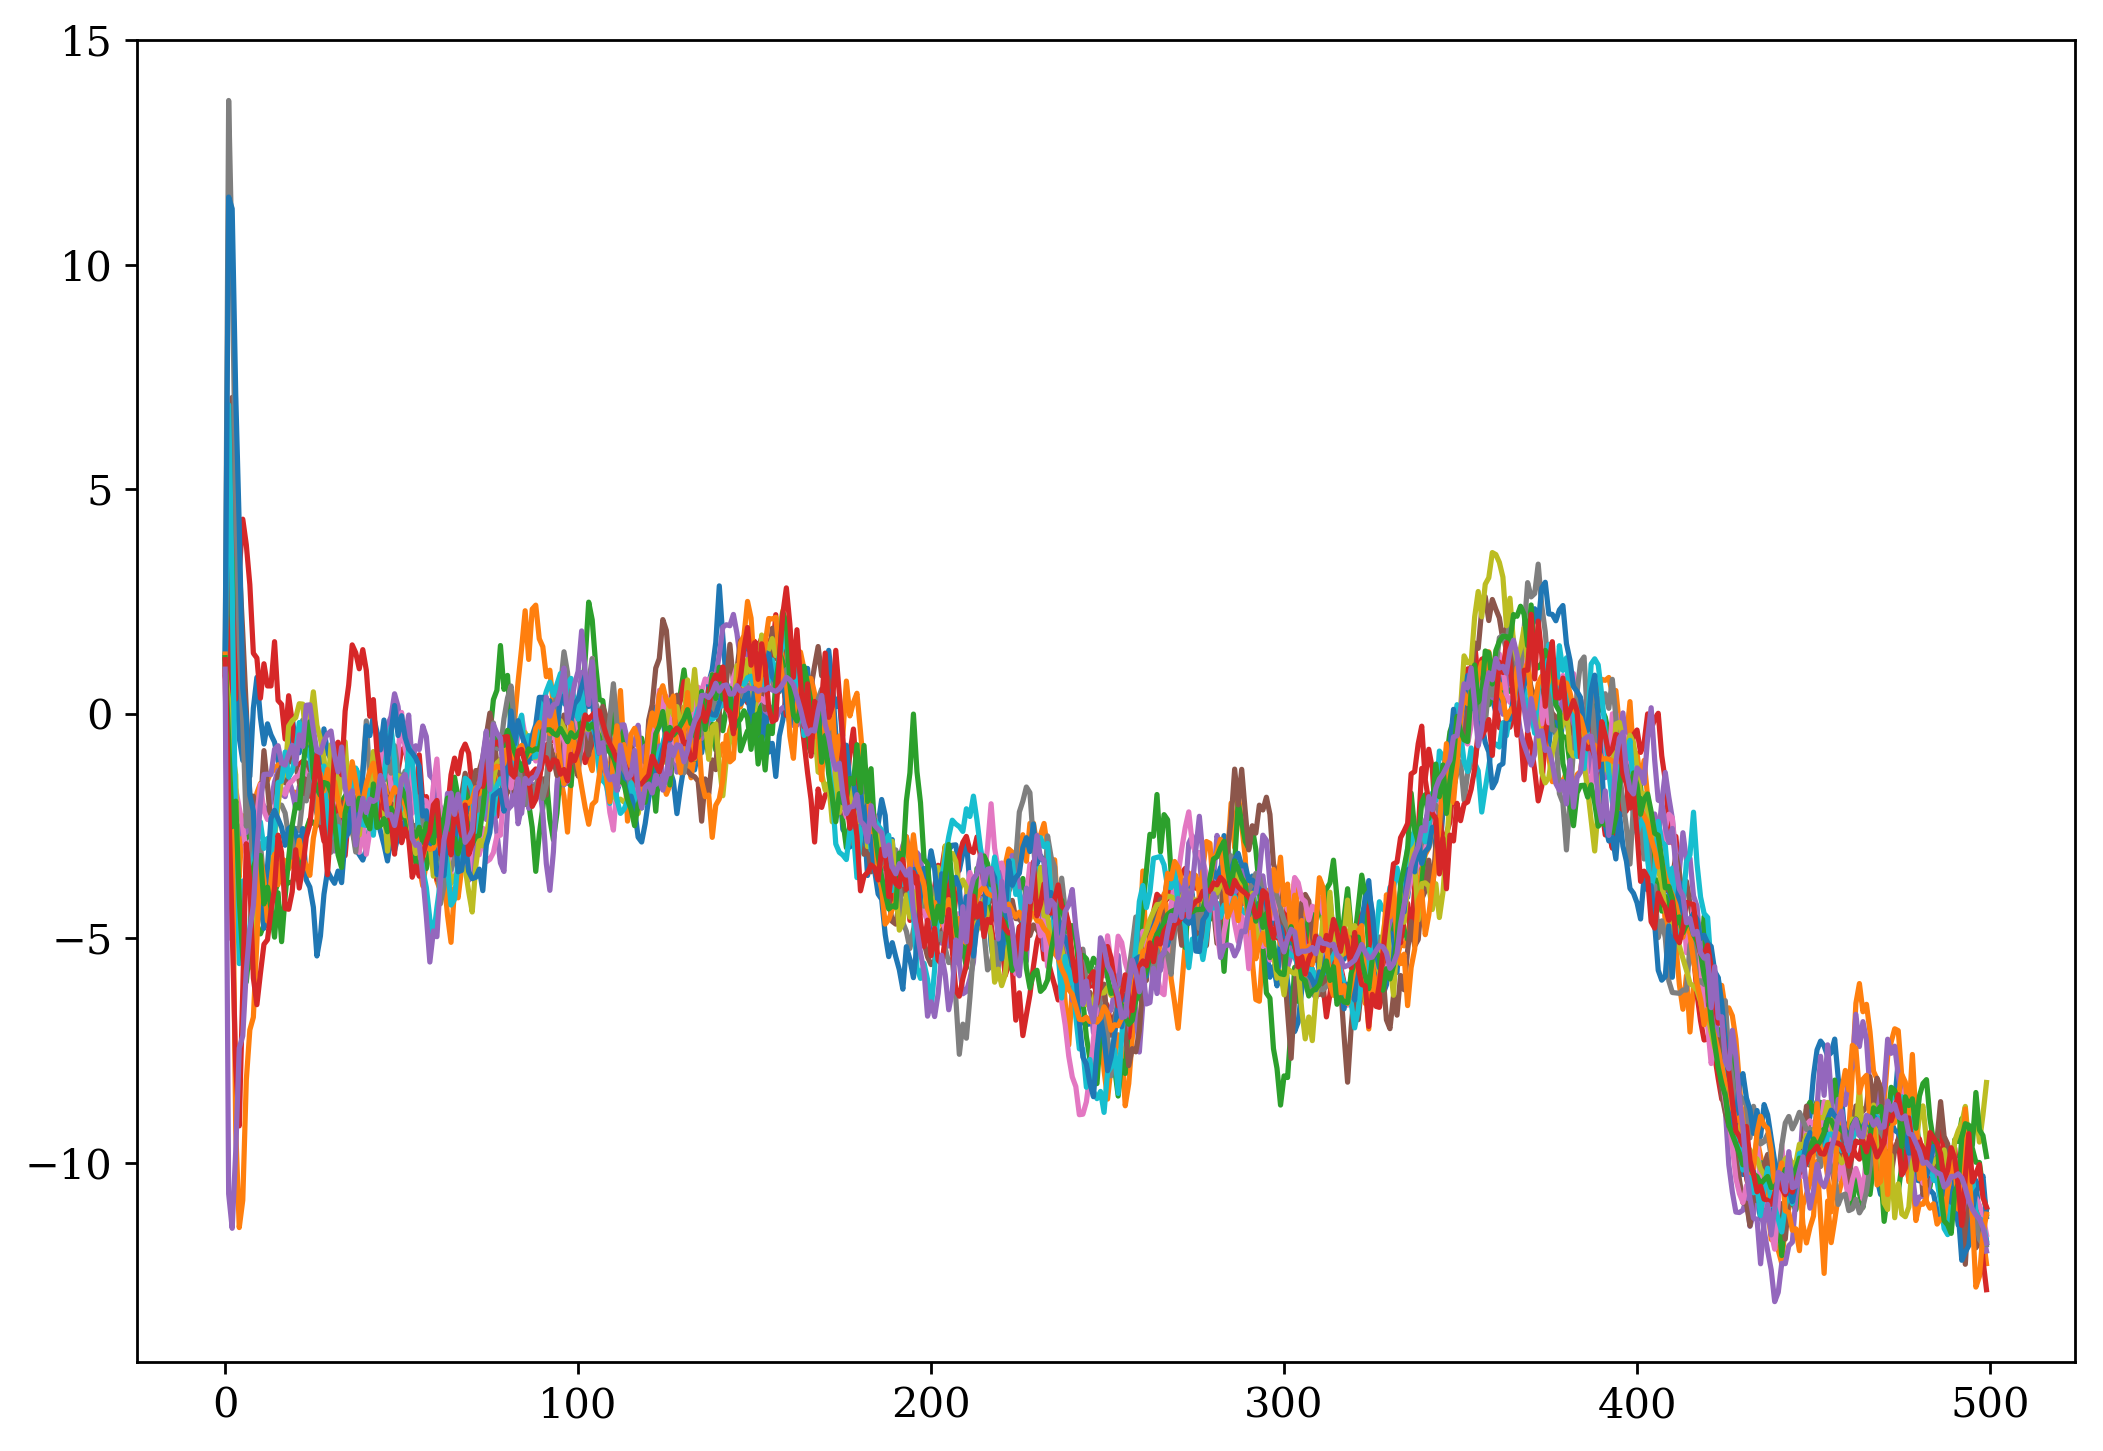

In [42]:
for nd in list(diff_G.nodes):
    xs = np.array(nd.logger['x'])[:, 3]
    plt.plot(xs)

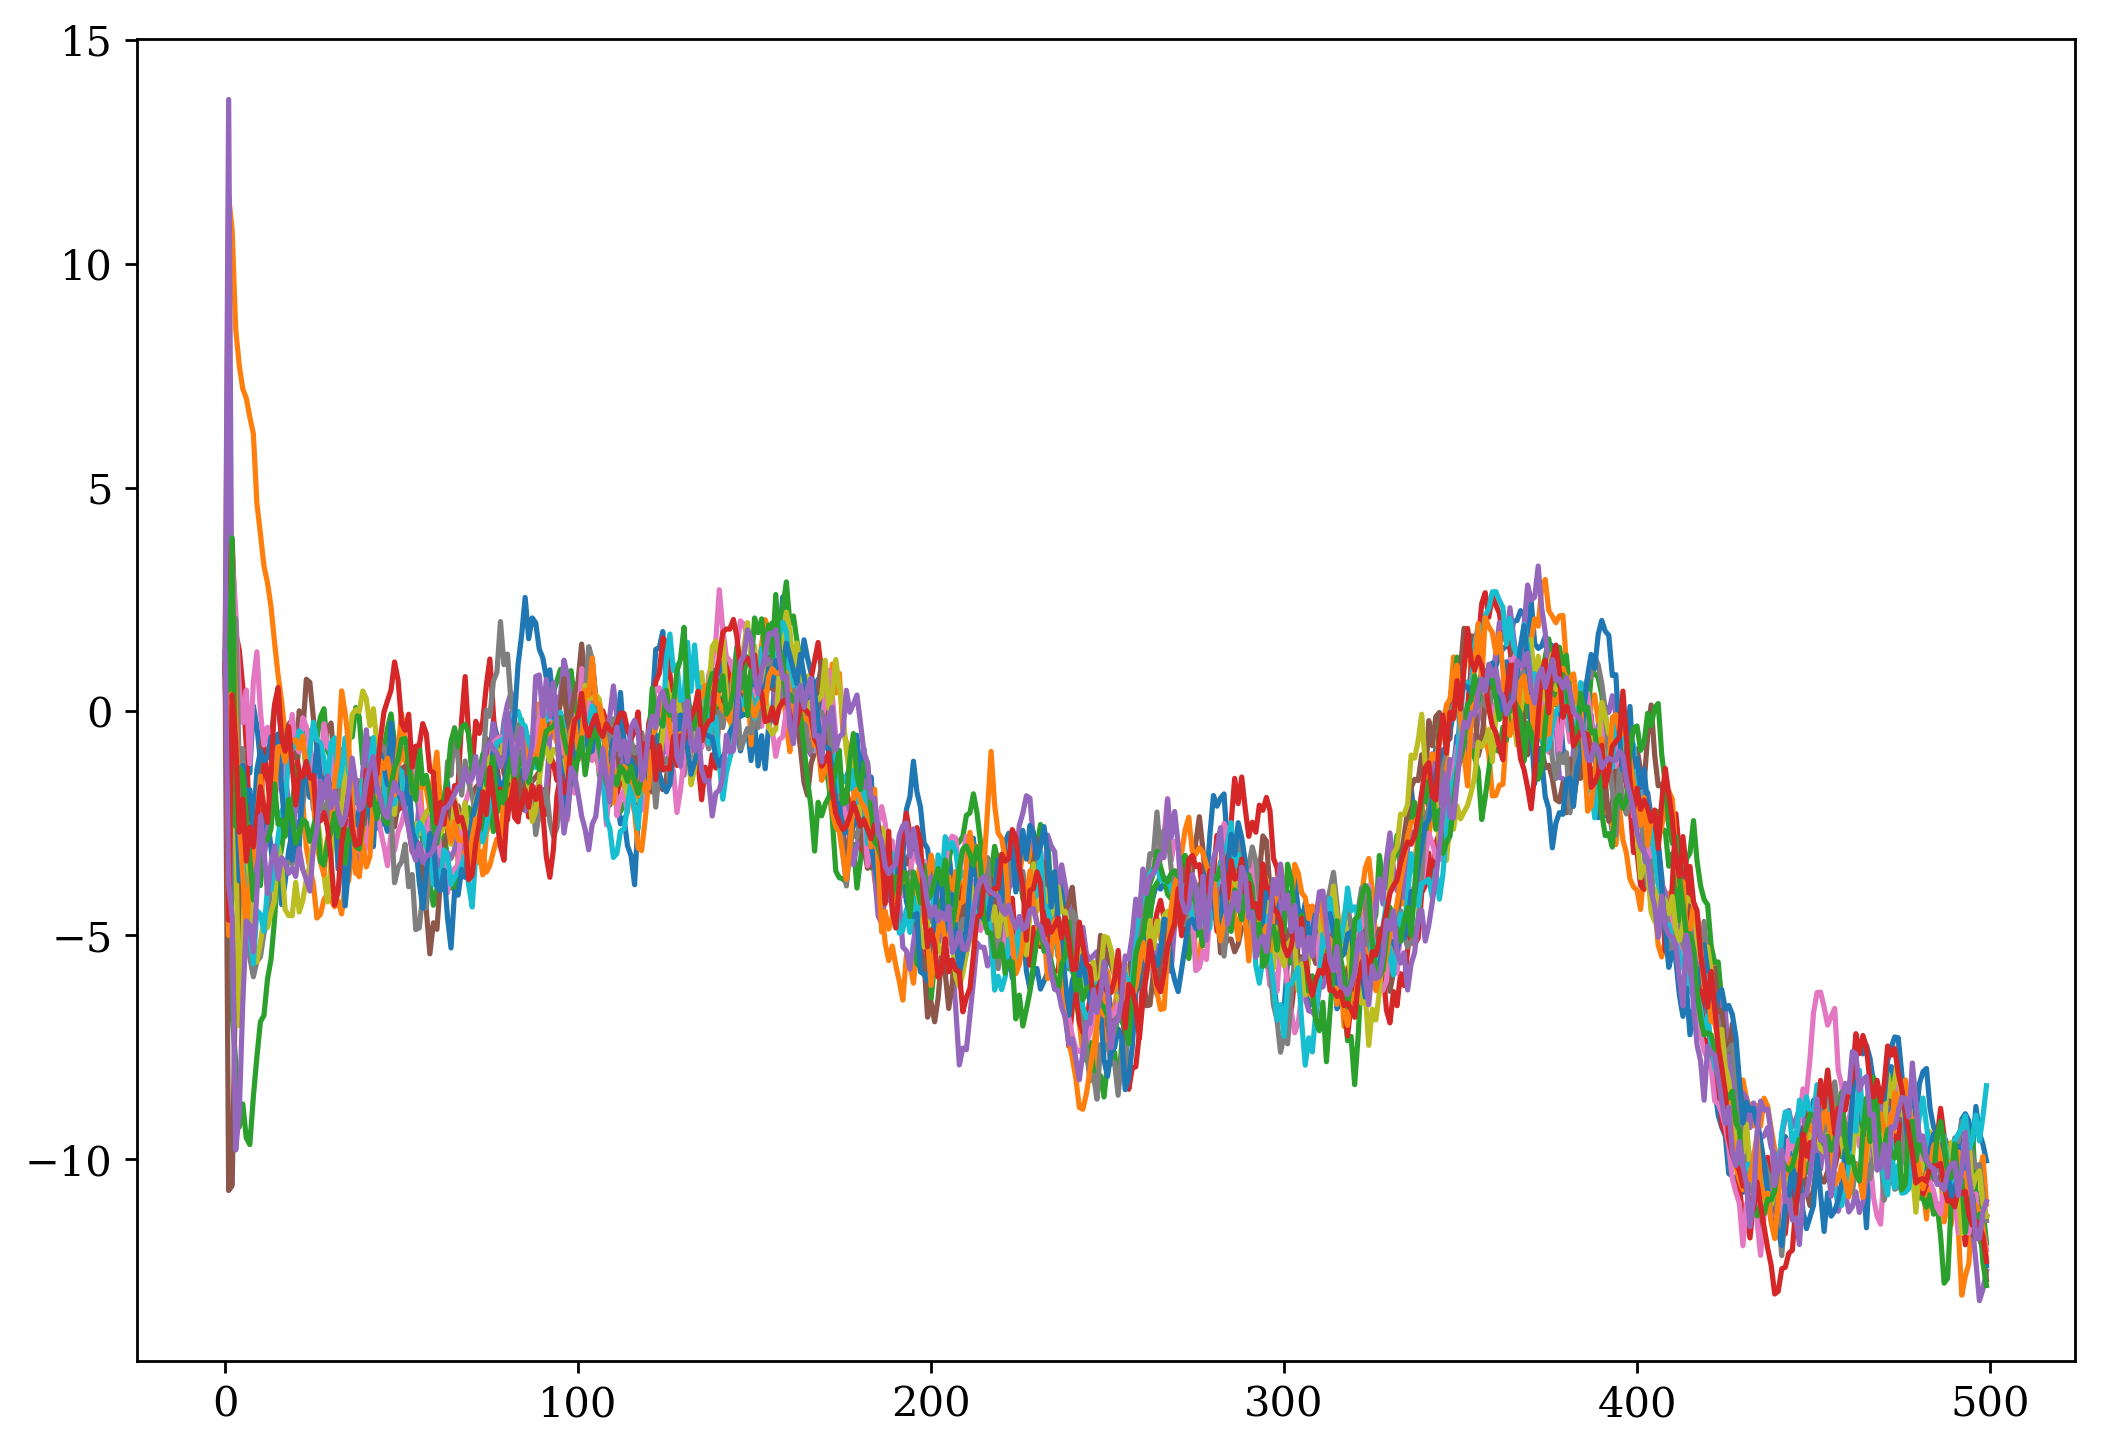

In [43]:
for nd in list(nodiff_G.nodes):
    xs = np.array(nd.logger['x'])[:, 3]
    plt.plot(xs)

In [ ]:
for nd in list(diff_G.nodes):
    xs = [np.linalg.norm(x) for x in nd.logger['R']]
    plt.plot(xs, label=f'{nd} - R_post')
    #plt.plot(ys, label=f'{nd} - observation')
    
#plt.plot(true_traj[:, 0])
#plt.legend()

<Node: 45032> 250
<Node: 45312> 250
<Node: 44472> 250
<Node: 45872> 250
<Node: 44752> 250
<Node: 44192> 250
<Node: 63208> 250
<Node: 64048> 250
<Node: 62928> 250
<Node: 46152> 250
<Node: 62760> 250
<Node: 63768> 250
<Node: 63488> 250
<Node: 64328> 250
<Node: 45592> 250


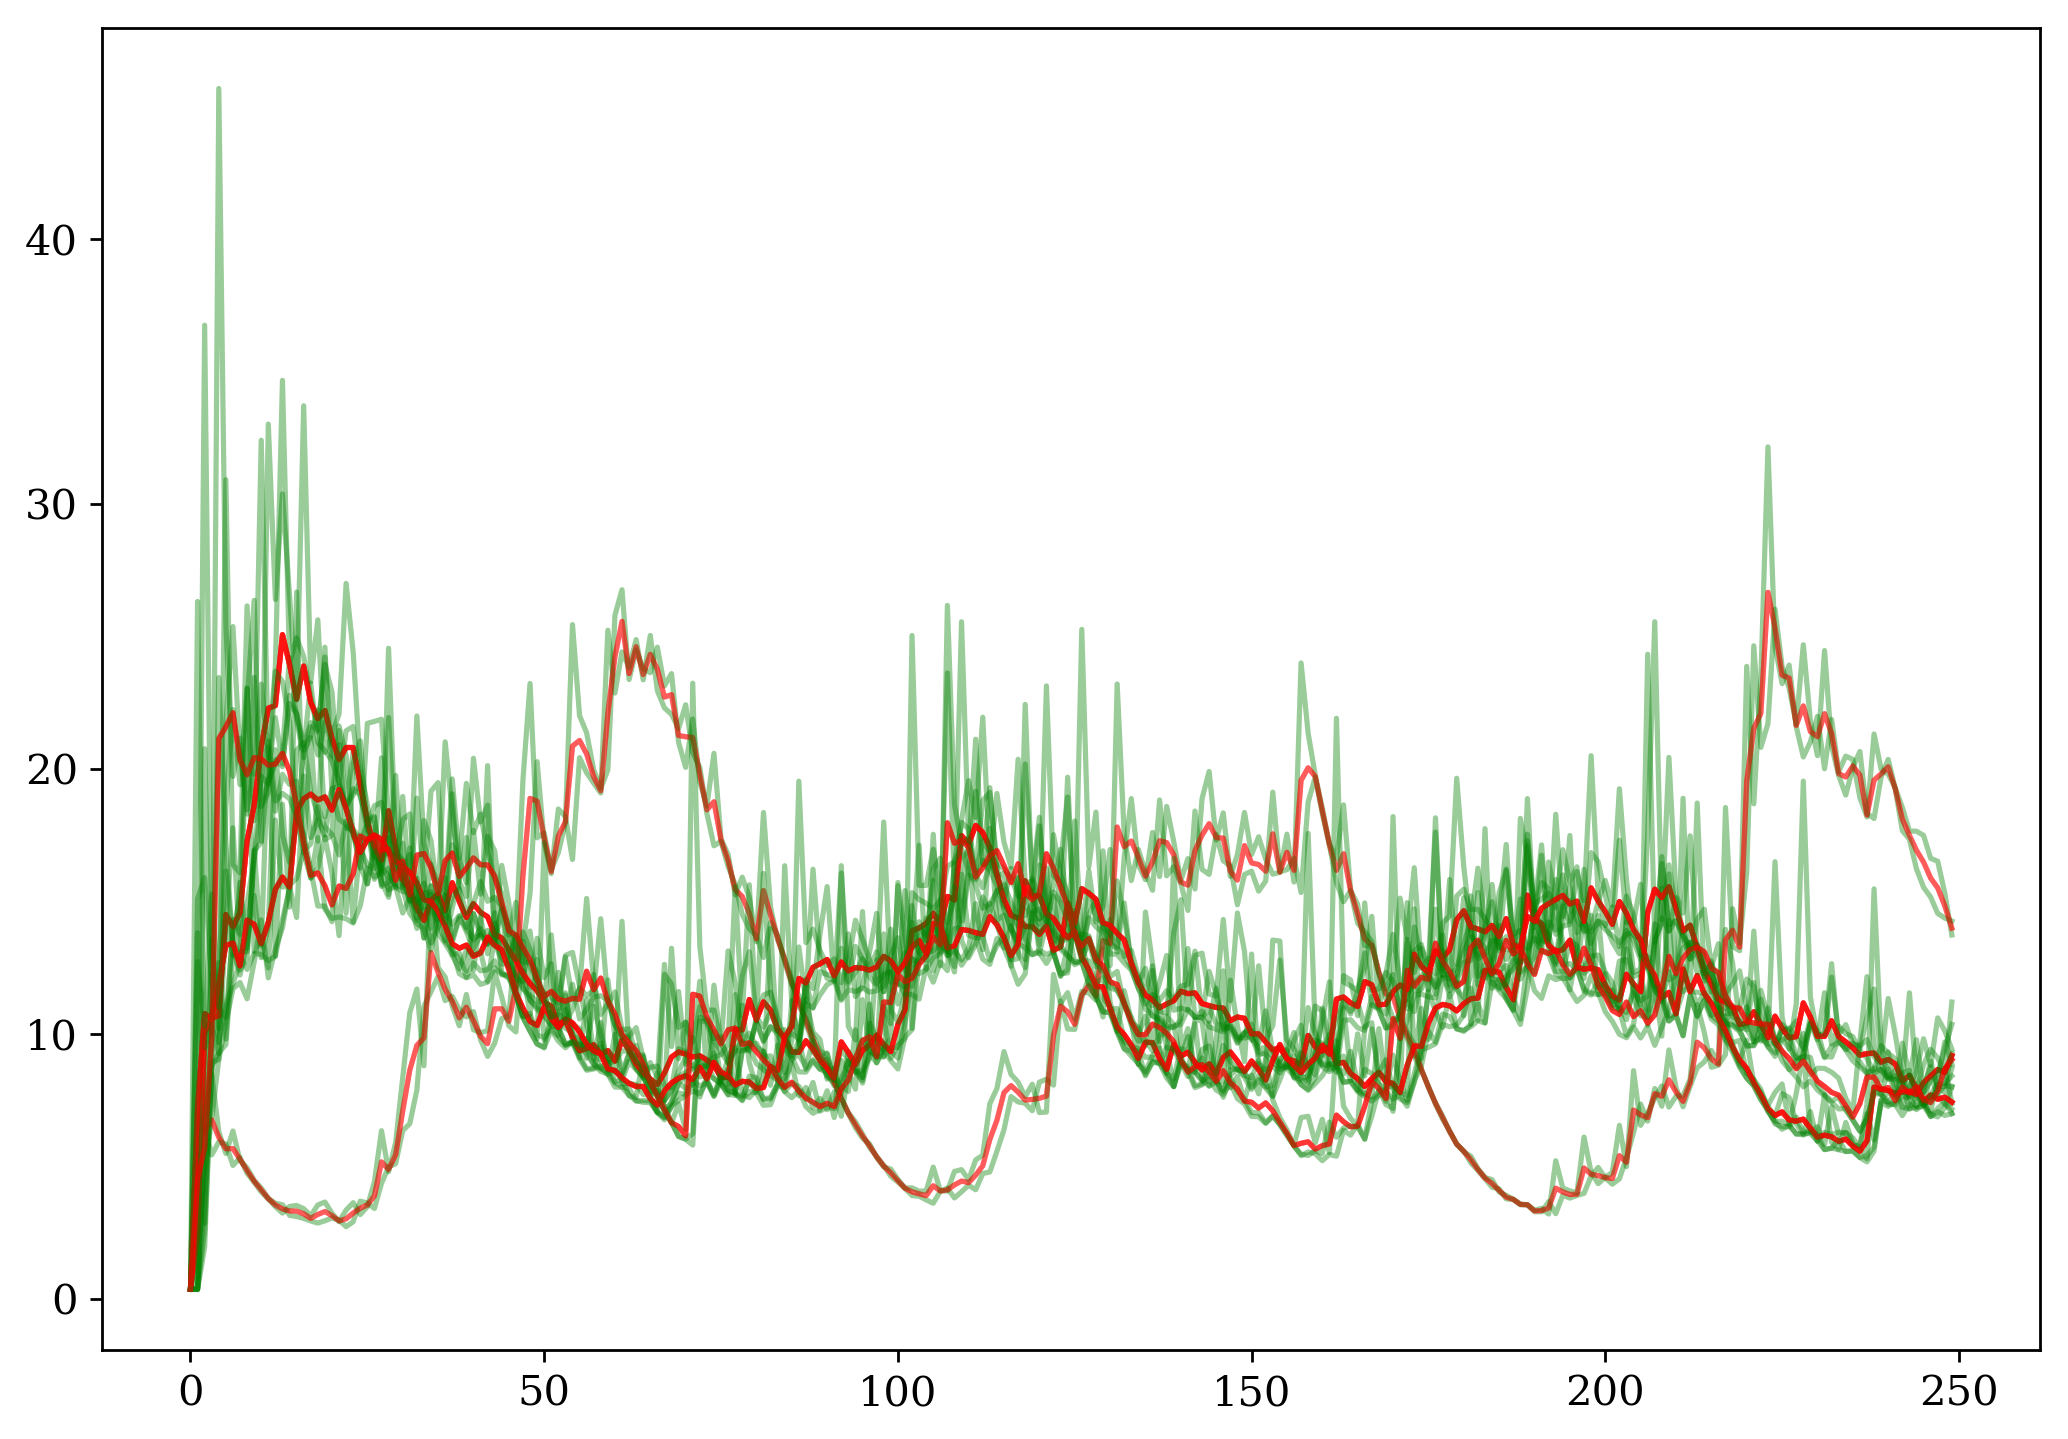

In [50]:
for nd in list(diff_G.nodes):
    xs = [np.linalg.norm(x) for x in nd.logger['R']]
    xspost = [np.linalg.norm(x) for x in nd.logger['R_post']]
    #ys = [x[0] for x in nd.logger['y']]
    plt.plot(xs, label=f'{nd} - R', color='g', alpha=0.4)
    plt.plot(xspost, label=f'{nd} - R_post', color='r', alpha=0.4)
    #plt.plot(ys, label=f'{nd} - observation')
    print(nd, len(xspost))
    
#plt.plot(true_traj[:, 0])
#plt.legend()

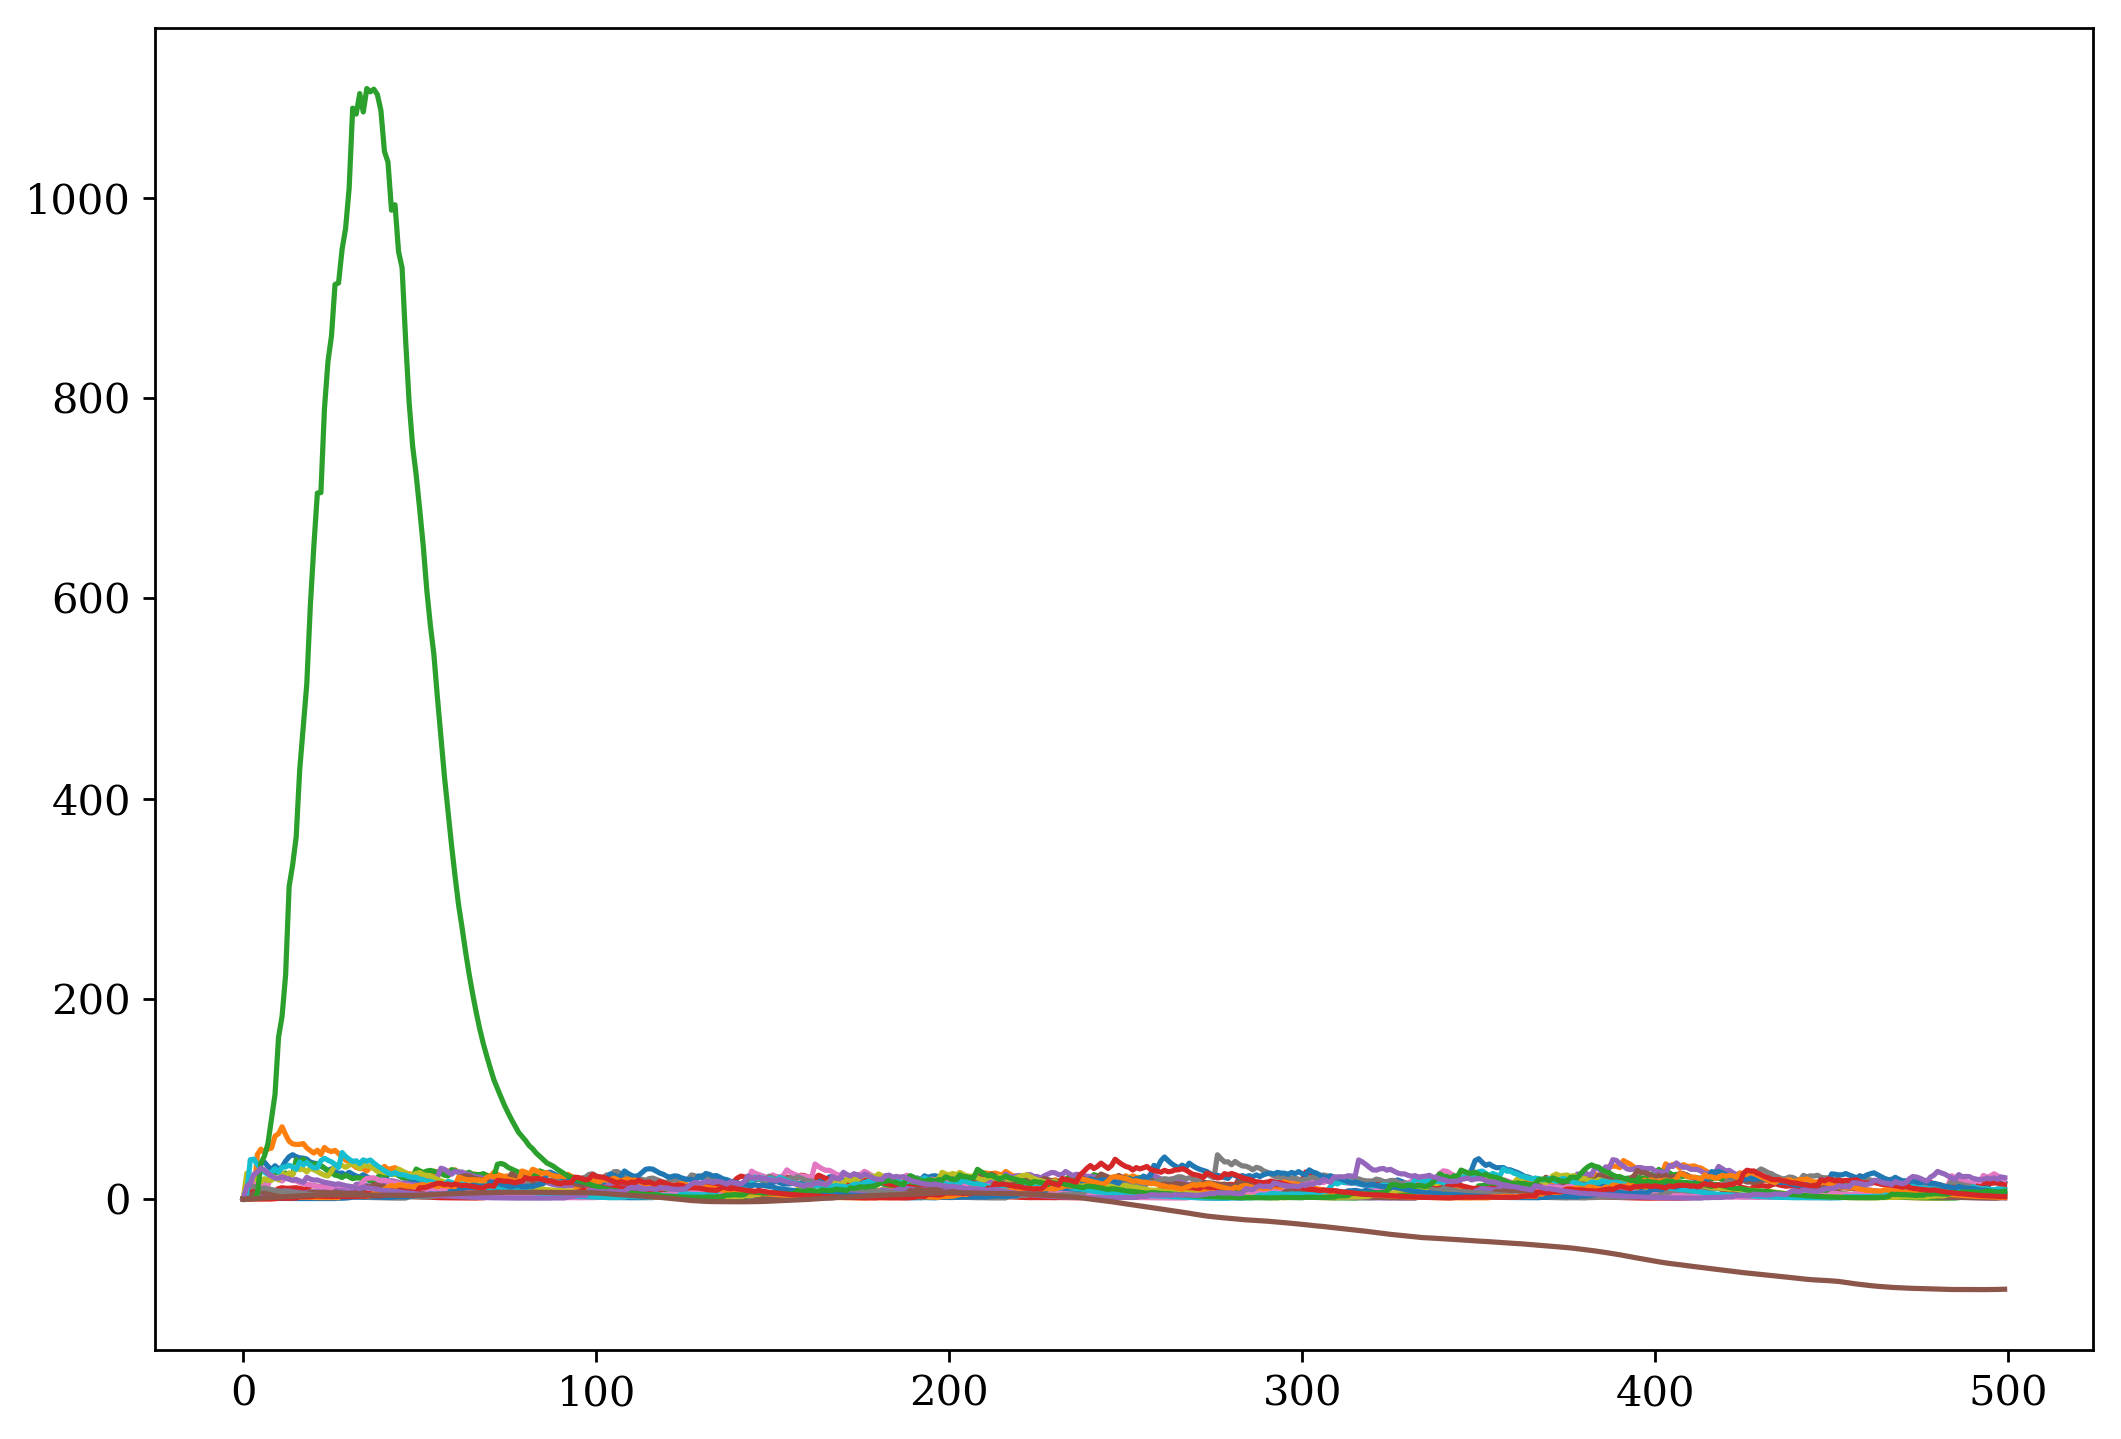

In [45]:
for nd in list(nodiff_G.nodes):
    xs = [np.linalg.norm(x) for x in nd.logger['R']]
    ys = [x[0] for x in nd.logger['y']]
    plt.plot(xs, label=f'{nd} - R')
    #plt.plot(ys, label=f'{nd} - observation')
    
plt.plot(true_traj[:, 0])
#plt.legend()